In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Getting Dataset

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = True, transform = transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

BATCH_SIZE = 128

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

9
Ankle Boot


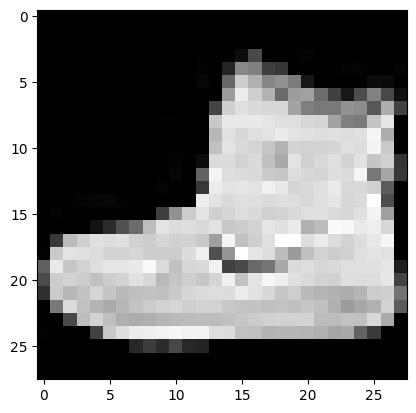

In [4]:
from utils import output_label

image, label = next(iter(train_dataset))
plt.imshow(image.squeeze(), cmap="gray")
print(label)
print(output_label(label))

In [6]:
from utils import train_loop, test_loop
from models import CNN
import pickle
import os

dropout_list = [0, 0.25, 0.5, 0.75]

num_epochs = 20
lr = 0.001


for x in dropout_list:
    print('For dropout : {}'.format(x))
    model = CNN(dropout= x)
    model.to(device= device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = lr)

    tr_acc, te_acc = [], []
    tr_loss, te_loss = [], []

    best_acc = 0

    for epoch in range(num_epochs):
        train_loss, train_correct = train_loop(train_loader, model, loss_fn, optimizer, device)
        test_loss, test_correct = test_loop(test_loader, model, loss_fn, device)

        print('Train Acc epoch {} : {} '.format(epoch, train_correct))
        print('Test Acc epoch {} : {} '.format(epoch, test_correct))

        tr_acc.append(train_correct)
        te_acc.append(test_correct)

        tr_loss.append(train_loss)
        te_loss.append(test_loss)

    file_name = 'baseline_CNN_dropout{}.pkl'.format(x) 

    with open(os.getcwd() + '/results/' + file_name, 'wb') as file:
        pickle.dump(tr_acc, file)
        pickle.dump(te_acc, file)
        pickle.dump(tr_loss, file)
        pickle.dump(te_loss, file)

    print("Best Acc : {} | Best Epoch : {}".format(max(te_acc), te_acc.index(max(te_acc))))

For dropout : 0


c:\Users\ianch\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Acc epoch 0 : 0.8513833333333334 
Test Acc epoch 0 : 0.8616 
Train Acc epoch 1 : 0.8948 
Test Acc epoch 1 : 0.8801 
Train Acc epoch 2 : 0.9073 
Test Acc epoch 2 : 0.8882 
Train Acc epoch 3 : 0.9160333333333334 
Test Acc epoch 3 : 0.8889 
Train Acc epoch 4 : 0.92235 
Test Acc epoch 4 : 0.9072 
Train Acc epoch 5 : 0.9282 
Test Acc epoch 5 : 0.9086 
Train Acc epoch 6 : 0.9334166666666667 
Test Acc epoch 6 : 0.8995 
Train Acc epoch 7 : 0.9373333333333334 
Test Acc epoch 7 : 0.9038 
Train Acc epoch 8 : 0.94195 
Test Acc epoch 8 : 0.9053 
Train Acc epoch 9 : 0.9462166666666667 
Test Acc epoch 9 : 0.901 
Train Acc epoch 10 : 0.9484666666666667 
Test Acc epoch 10 : 0.9006 
Train Acc epoch 11 : 0.9490333333333333 
Test Acc epoch 11 : 0.8938 
Train Acc epoch 12 : 0.9536166666666667 
Test Acc epoch 12 : 0.8993 
Train Acc epoch 13 : 0.95525 
Test Acc epoch 13 : 0.8957 
Train Acc epoch 14 : 0.9556833333333333 
Test Acc epoch 14 : 0.8943 
Train Acc epoch 15 : 0.9589333333333333 
Test Acc epoch

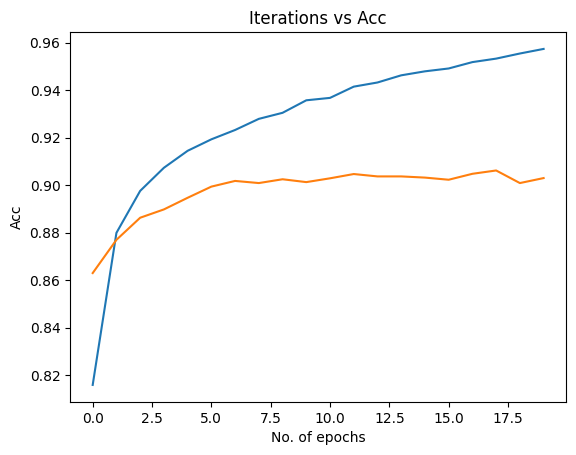

In [7]:
plt.plot(range(num_epochs), tr_acc)
plt.plot(range(num_epochs), te_acc)
plt.xlabel("No. of epochs")
plt.ylabel("Acc")
plt.title("Iterations vs Acc")
plt.show()

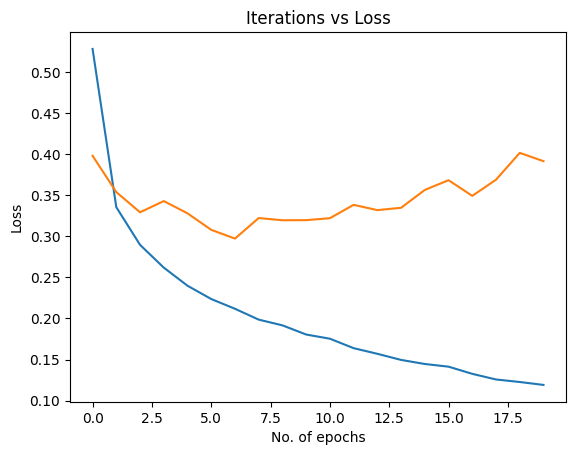

In [8]:
plt.plot(range(num_epochs), tr_loss)
plt.plot(range(num_epochs), te_loss)
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

In [15]:
print("Best Acc : {} | Best Epoch : {}".format(max(te_acc), te_acc.index(max(te_acc))))

Best Acc : 0.9066 | Best Epoch : 8


## Pickle out results and accuracies

In [19]:
import pickle
import os

file_name = 'baseline_CNN.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'wb') as file:
    pickle.dump(tr_acc, file)
    pickle.dump(te_acc, file)
    pickle.dump(tr_loss, file)
    pickle.dump(te_loss, file)

## Pickle in results and accuracies

In [21]:
file_name = 'baseline_CNN.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'rb') as file:
    tr_acc = pickle.load(file)
    te_acc = pickle.load(file)
    tr_loss = pickle.load(file)
    te_loss = pickle.load(file)


print(tr_acc)
print(te_acc)
print(tr_loss)
print(te_loss)

[0.8457333333333333, 0.8920833333333333, 0.9039666666666667, 0.9146666666666666, 0.9222666666666667, 0.9263166666666667, 0.9320833333333334, 0.9362833333333334, 0.9403833333333333, 0.9440833333333334, 0.9477833333333333, 0.9496166666666667, 0.9519833333333333, 0.9556833333333333, 0.9568666666666666, 0.9581333333333333, 0.9594166666666667, 0.96075, 0.9625833333333333, 0.9638333333333333]
[0.8601, 0.8755, 0.891, 0.904, 0.9026, 0.9012, 0.9035, 0.9049, 0.9066, 0.9056, 0.8996, 0.9013, 0.8972, 0.8967, 0.8975, 0.8933, 0.8958, 0.8947, 0.8941, 0.8819]
[0.4357489900929587, 0.3019022142518558, 0.2678435962083243, 0.24056633077323564, 0.21899496069722085, 0.20378791980906083, 0.18782627019387826, 0.1759960425973955, 0.16525319283768566, 0.1545840719980853, 0.1451213597965393, 0.13864999555988605, 0.12982593746835996, 0.12251129968445311, 0.11824226782504302, 0.11515209018818733, 0.11056489282563678, 0.10758647995033879, 0.103664388300291, 0.1008517388730987]
[0.3988858495332018, 0.352926621142822,